# Intro
La idea es entrenar un modelo de ml para luego registrarlo con MLFlow, por lo que en el notebook se realizará el proceso que después lo implantaremos mediante scripts

In [1]:
# Librerías

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Leemos los datos
df = pd.read_csv('../data/raw/titanic.csv')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Feature selection
Ya hemos visto qué variables influyen más, así que procederemos a seleccionar variables que nos interese

In [6]:
columns_X = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "class", "who", "embark_town", "alone"]
columns_y = ["survived"]

df_X = df.loc[:, columns_X]
df_y = df.loc[:, columns_y]

# Tratamos las variables métricas

In [16]:
# Seleccionamos las variables métricas
numeric = df_X.loc[:,["age", "fare"]]

In [17]:
# Vemos los nans de las numéricas
numeric.isnull().sum()

age     177
fare      0
dtype: int64

In [18]:
# Imputamos los valores de la edad
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
matrix_numeric = imputer.fit_transform(numeric)

numeric_not_null = pd.DataFrame(matrix_numeric, columns = numeric.columns)

In [19]:
numeric_not_null.isnull().sum()

age     0
fare    0
dtype: int64

In [25]:
# Estandarizamos las variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
matrix_standar = scaler.fit_transform(numeric_not_null)

df_num_scaled = pd.DataFrame(matrix_standar, columns=numeric_not_null.columns)

In [26]:
df_num_scaled.head()

,age,fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


# Tratamos variables categóricas

In [28]:
categor = df_X.drop(numeric.columns, axis=1)

In [31]:
# Tratamos los nulos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

matrix_cat = imputer.fit_transform(categor)
cat_not_null = pd.DataFrame(matrix_cat, columns=categor.columns)

In [34]:
# Hacemos dummies para que lo entienda el modelo
cat_clean = pd.get_dummies(cat_not_null)

/tmp/ipykernel_10459/2204880212.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_clean = pd.get_dummies(cat_not_null)
/tmp/ipykernel_10459/2204880212.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_clean = pd.get_dummies(cat_not_null)
/tmp/ipykernel_10459/2204880212.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_clean = pd.get_dummies(cat_not_null)


# Unimos los 2 dataframe

In [36]:
df_clean = pd.concat([df_num_scaled, cat_clean], axis=1)

# Separamos en train y test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean, df_y, test_size = 0.1)

# Entrenamos el modelo

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/nalaminos/Entornos/mlops-titanic/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
# Evaluamos el resultado
yhat = lr.predict(X_test)

______________________________________________________________________
accuracy => 0.8444444444444444
______________________________________________________________________
precission => 0.6944444444444444
______________________________________________________________________
recall => 0.8928571428571429
______________________________________________________________________
f1 => 0.78125


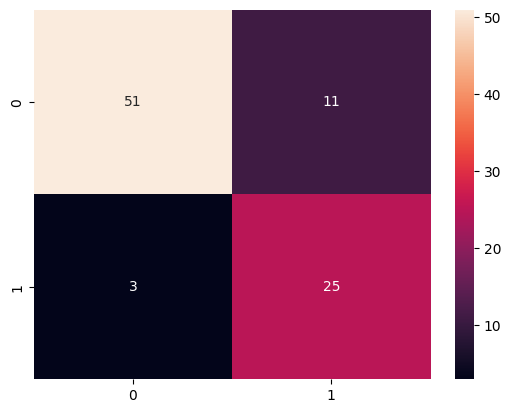

In [45]:
# PLoteamos la matriz de confusión de los datos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
sns.heatmap(confusion_matrix(y_test, yhat), annot=True)
print("_______" *10)
print(f'accuracy => {accuracy_score(y_test, yhat)}')
print("_______" *10)
print(f'precission => {precision_score(y_test, yhat)}')
print("_______" *10)
print(f'recall => {recall_score(y_test, yhat)}')
print("_______" *10)
print(f'f1 => {f1_score(y_test, yhat)}')

# Conclusiones
Vemos que el modelo podría mejorar, pero como lo que queremos practicar es a desplegar un modelo, con esto nos bastará